# Least square problem for polynomial regression 

## import library

In [427]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

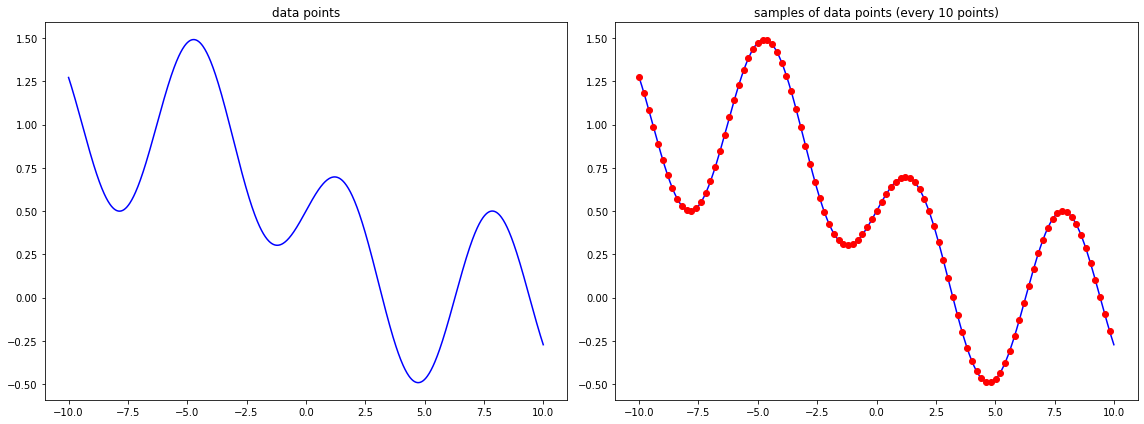

In [428]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [429]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
#     # complete the blanks
#     #
    
    
    if x.ndim == 1:
        x = x[:, None]
    A = np.ones((x.shape[0], 1))
    
    p = len(x)
    for degree in range(1, p):
        A = np.hstack((A, x**degree))
       
#     #
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A

print(construct_matrix_A(x,p).shape)

C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))


(1000, 1000)


In [430]:

# n = len(x)
# p = n
# A = np.zeros([n, p])

# a1 = range(p)
# for i in a1:
#     for j in a1:
#         A[i, j] = np.power(A[i], a1)
    
# print(A.shape)

## construct vector $b$

In [431]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for i in range(n):
        b[i] = y[i]
        
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b

print(construct_vector_b(y).T.shape)

(1, 1000)


## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [432]:
def solve_regression(x, y, p):


    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
    
    
    
    # z = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(construct_matrix_A(x,p)),construct_matrix_A(x,p))), np.transpose(construct_matrix_A(x,p))), construct_vector_b(y).T)
    loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y).T).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y).T))/(2*len(x))
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [433]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
   
    z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
   
   
    # z = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(construct_matrix_A(x,p)),construct_matrix_A(x,p))), np.transpose(construct_matrix_A(x,p))), y) + np.matmul(np.multiply(len(y),alpha), np.identity)
    loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y).T).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y).T))/(2*len(y)) + (alpha/2)*np.sum(z**2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [434]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
    z_star = np.argmin(np.matmul(construct_matrix_A(x,p), z))
    y_hat = np.dot(construct_matrix_A(x,p), z_star)
    
    # z = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(construct_matrix_A(x,p)),construct_matrix_A(x,p))), np.transpose(construct_matrix_A(x,p))), construct_vector_b(y).T)
    # y_hat = np.dot(construct_matrix_A(x,p), np.argmin(construct_matrix_A(x,p)))
    loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y).T).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y).T))/(2*len(y))
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [435]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
   
    z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
    z_star = np.argmin(np.matmul(construct_matrix_A(x,p), z))
    y_hat = np.dot(construct_matrix_A(x,p), z_star)

    
    # z = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(construct_matrix_A(x,p)),construct_matrix_A(x,p))), np.transpose(construct_matrix_A(x,p))), construct_vector_b(y).T) + np.matmul(np.dot(len(y),alpha), np.identity)
    # y_hat = np.dot(construct_matrix_A(x,p), np.argmin(construct_matrix_A(x,p)))
    loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y).T).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y).T))/(2*len(y)) + (alpha/2)*np.sum(z**2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [436]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [437]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [438]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [439]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [440]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [441]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [442]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [443]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [444]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [445]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [446]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [447]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [448]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [449]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [450]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


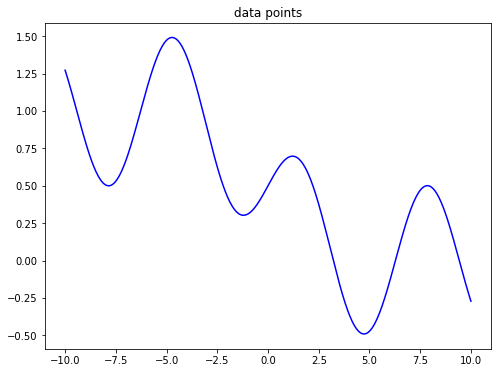

**************************************************
## [RESULT 02]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


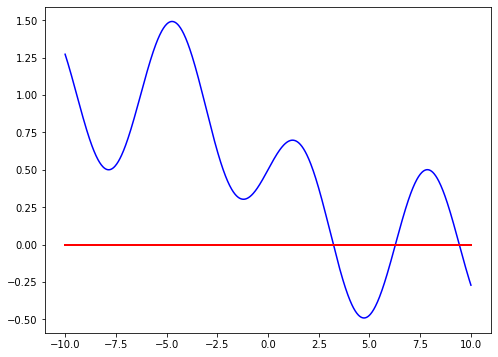

**************************************************
## [RESULT 03]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


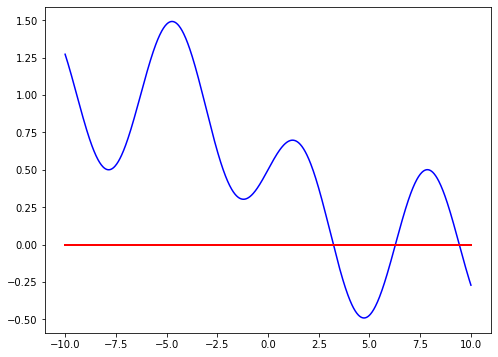

**************************************************
## [RESULT 04]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


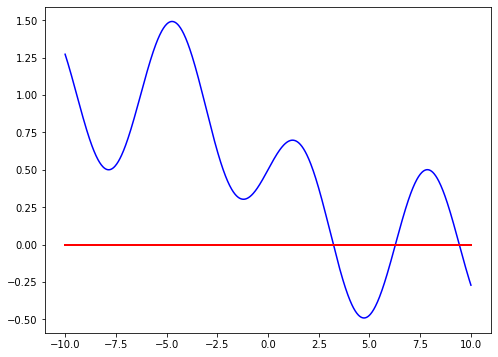

**************************************************
## [RESULT 05]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


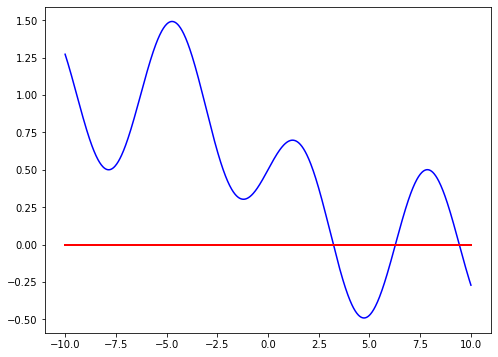

**************************************************
## [RESULT 06]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


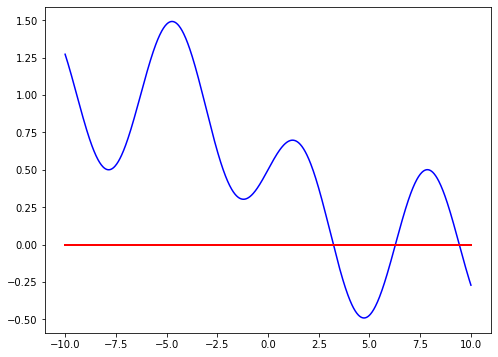

**************************************************
## [RESULT 07]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


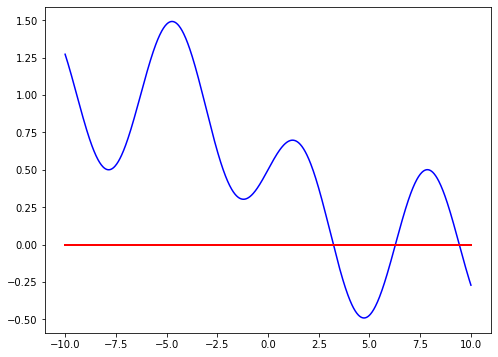

**************************************************
## [RESULT 08]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


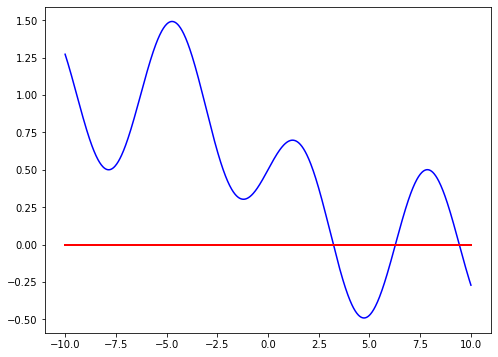

**************************************************
## [RESULT 09]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


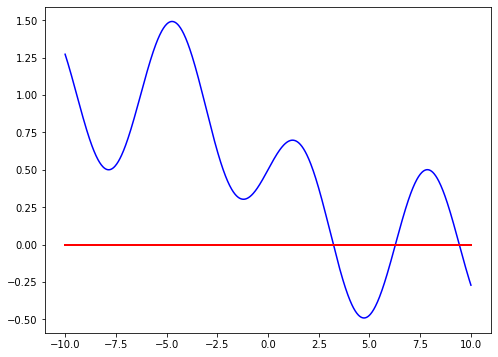

**************************************************
## [RESULT 10]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


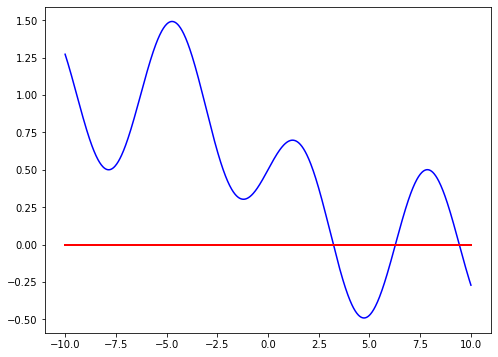

**************************************************
## [RESULT 11]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\3502139037.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p) + len(x) * alpha * np.identity(len(x))) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


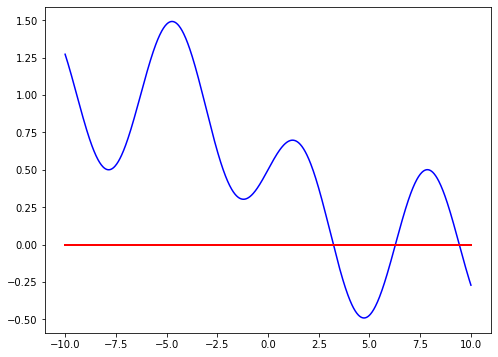

**************************************************
## [RESULT 12]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\2222124568.py:17: RuntimeWarning: overflow encountered in power
  A = np.hstack((A, x**degree))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: overflow encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_25516\1838828473.py:11: RuntimeWarning: invalid value encountered in matmul
  z = np.linalg.inv(construct_matrix_A(x,p).T @ construct_matrix_A(x,p)) @ construct_matrix_A(x,p).T @ construct_vector_b(y)


loss =  [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
**************************************************
## [RESULT 13]
**************************************************
loss =  [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
**************************************************
## [RESULT 14]
**************************************************
loss =  [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
**************************************************
## [RESULT 15]
**************************************************
loss =  [[nan nan nan ... nan nan nan]
 [nan nan 

In [451]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)